# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
import keras

Using TensorFlow backend.


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
# change the dtype to 'float64' 
import numpy as np
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')

x_train /= 255
x_test /= 255

In [0]:
y_train_nrm = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_nrm = tf.keras.utils.to_categorical(y_test, num_classes=10)

label for each of the below image: 6
label for each of the below image: 9
label for each of the below image: 9
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 8
label for each of the below image: 3


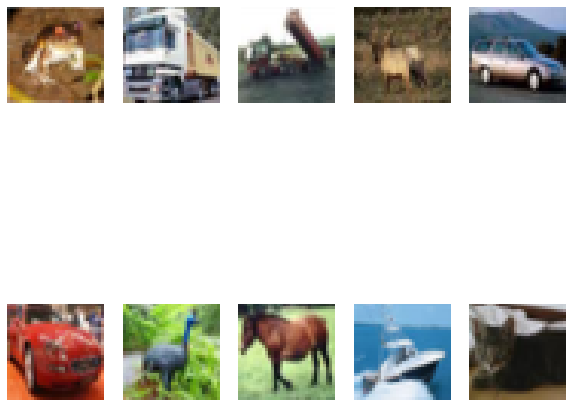

In [0]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train_nrm[0:10][i])))
plt.show()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#normalize data
#model.add(tf.keras.layers.BatchNormalization())

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',input_shape=(32,32,3)))
#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))


model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6422656   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [96]:
#Training the model
model.fit(x_train,y_train_nrm, validation_data=(x_test,y_test_nrm), epochs=10, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 249s 5ms/sample - loss: 1.7334 - accuracy: 0.3593 - val_loss: 1.5203 - val_accuracy: 0.4567
Epoch 2/10
50000/50000 [==============================] - 249s 5ms/sample - loss: 1.3304 - accuracy: 0.5127 - val_loss: 1.3596 - val_accuracy: 0.5074
Epoch 3/10
50000/50000 [==============================] - 250s 5ms/sample - loss: 1.1673 - accuracy: 0.5739 - val_loss: 1.2577 - val_accuracy: 0.5836
Epoch 4/10
50000/50000 [==============================] - 248s 5ms/sample - loss: 1.0325 - accuracy: 0.6210 - val_loss: 1.0894 - val_accuracy: 0.6273
Epoch 5/10
50000/50000 [==============================] - 246s 5ms/sample - loss: 0.9128 - accuracy: 0.6607 - val_loss: 1.1448 - val_accuracy: 0.6118
Epoch 6/10
50000/50000 [==============================] - 247s 5ms/sample - loss: 0.8072 - accuracy: 0.6993 - val_loss: 1.6381 - val_accuracy: 0.5540
Epoch 7/10
50000/50000 [==========================

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [0]:
#Load and resize this image
image1="/content/drive/My Drive/AIMLDataContent/images/49436743043_2441587ab9_c.jpg"
image2="/content/drive/My Drive/AIMLDataContent/images/4994221690_d070e8a355_c.jpg"
image3="/content/drive/My Drive/AIMLDataContent/images/49438170746_8378201627_c.jpg"
image4="/content/drive/My Drive/AIMLDataContent/images/49441887332_107afa786d_c.jpg"
img = tf.keras.preprocessing.image.load_img(image1)
img = img.resize((600,400))

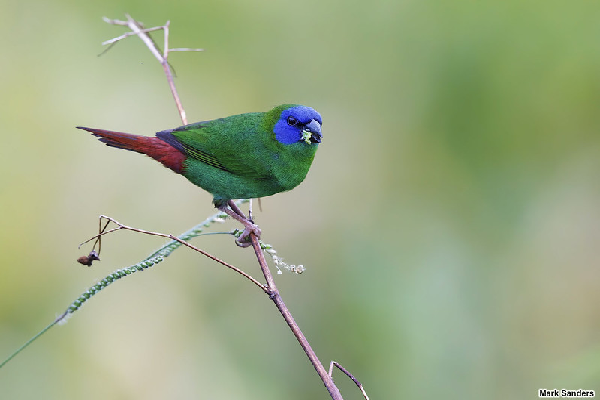

In [75]:
img

In [76]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

553467904/553467096 [==============================] - 6s 0us/step


In [77]:
#Prepare Input 
#VGG takes 224x224 image
model_input = img.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [78]:
#Predict
prediction = vgg.predict(model_input)
prediction.shape

(1, 1000)

In [79]:
#Prediction Class
np.argmax(prediction[0])

94

In [80]:
tf.keras.applications.vgg16.decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


[[('n01833805', 'hummingbird', 0.40052846),
  ('n01828970', 'bee_eater', 0.23913911),
  ('n01537544', 'indigo_bunting', 0.11363034),
  ('n02268853', 'damselfly', 0.044835694),
  ('n02268443', 'dragonfly', 0.038814053)]]

#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/AIMLDataContent/tweets.csv",encoding='unicode_escape')

In [148]:
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


**Drop null values**

*   Drop all the rows with null values




In [149]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet_text                                            9092 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


In [0]:
filtered_df = df.dropna()

In [152]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3291 non-null object
emotion_in_tweet_is_directed_at                       3291 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3291 non-null object
dtypes: object(3)
memory usage: 102.8+ KB


**Print the dataframe**
*   print initial 5 rows of the data


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re
filtered_df = filtered_df.applymap(lambda s: s.lower())
filtered_df = filtered_df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))
filtered_df = filtered_df.applymap(lambda s: s.strip())


In [154]:
filtered_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

In [155]:
filtered_df=filtered_df[filtered_df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['positive emotion','negative emotion'])]
filtered_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
filtered_df['is_there_an_emotion_directed_at_a_brand_or_product']=filtered_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1,'negative emotion':0})

In [157]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 9088
Data columns (total 3 columns):
tweet_text                                            3191 non-null object
emotion_in_tweet_is_directed_at                       3191 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3191 non-null int64
dtypes: int64(1), object(2)
memory usage: 99.7+ KB


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = filtered_df.tweet_text
y = filtered_df.is_there_an_emotion_directed_at_a_brand_or_product

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
vect = CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
logreg = LogisticRegression(C=1e9)

### Fit the classifer
- fit logistic regression classifier

In [163]:
logreg.fit(X_train_dtm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# use Naive Bayes to predict the star rating
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [165]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class_lr = logreg.predict(X_test_dtm)


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class_nb = nb.predict(X_test_dtm)



## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [168]:
print(metrics.accuracy_score(y_test, y_pred_class_lr))

0.8408521303258145


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [169]:
# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class_nb))

0.87468671679198
